# Visualization

In [1]:
import numpy as np
import os
dir_path = os.getcwd()
energy_dict = np.load(dir_path + '/Allalpha/energy_dict.npy',allow_pickle=True).item()
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Get the species, sorted alphabetically
# species = sorted(penguins["Key"].unique())
method_types = list(energy_dict.keys())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [np.array(energy_dict[key]) for key in energy_dict.keys()]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]

x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

# Colors
BG_WHITE = "#FFFFFF"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#edbdb9", "#bbcadc", "#d0e6cb", '#dbcee1', '#f0d8b3', '#BED4E7', '#B8D8BA', '#E5B061', '#FFC2D1', '#FFA07A']

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2, 3, 4]
# POSITIONS = [0, 1, 2, 3, 4, 5,6,7,8,9]
# Horizontal lines
HLINES = [-1, -3, 5, 10]

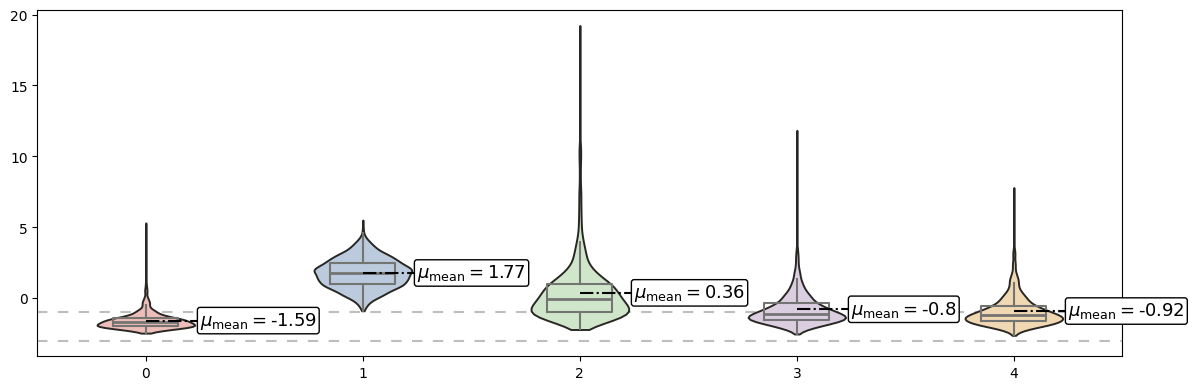

In [3]:
fig, ax = plt.subplots(figsize= (14, 4.5))
# fig, ax = plt.subplots(figsize= (35, 4.5))
# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
ax.axhline(-1, color=GREY50, ls=(0, (5, 5)), alpha=0.5, zorder=0)
ax.axhline(-3, color=GREY50, ls=(0, (5, 5)), alpha=0.5, zorder=0)
# Add violins ----------------------------------------------------
# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc, color in zip(violins['bodies'], COLOR_SCALE):
    pc.set_facecolor(color)
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=2, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=1.5, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    widths=0.3,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
# for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
#     ax.scatter(x, y, s = 100, color=color, alpha=0.4)

# Add mean value labels ------------------------------------------
means = [y.mean() for y in y_data]
for i, mean in enumerate(means):
    # Add dot representing the mean
    # ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
    # Add mean value label.
    ax.text(
        i + 0.25,
        mean,
        r"${\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

# Add multiple comparisons p-value for mean difference -----------
# Plot lines indicating what means are compared
# 'tick_len' gives the length of the tick on the end of each line


['Test', 'Random', 'Pretrain', 'Finetune', 'Prefix']


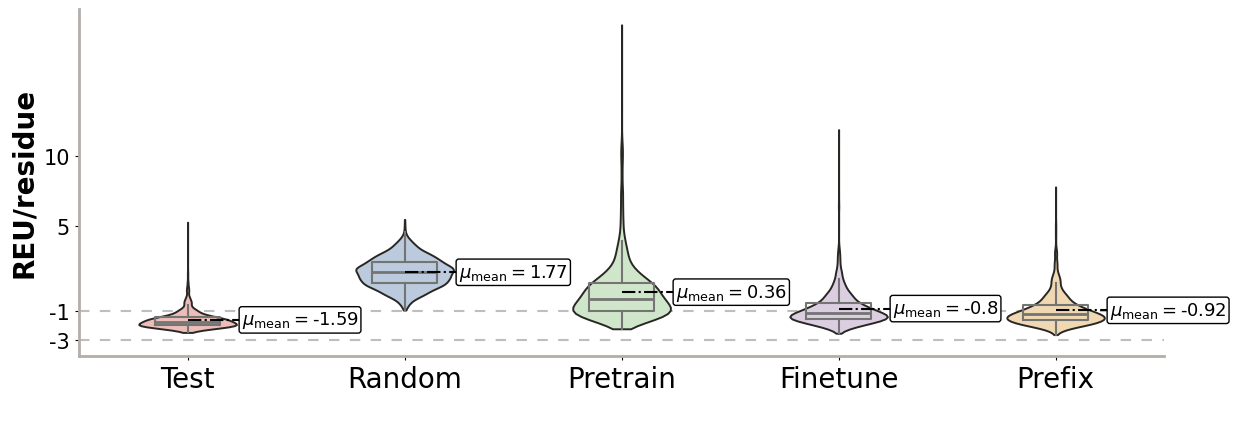

In [5]:
# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=3)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=15)
ax.set_ylabel("REU/residue", size=20, weight="bold")

# xlabels accounts for the sample size for each species
for i in range(len(method_types)):
    if 'Prefix' in method_types[i]:
        method_types[i] = 'Prefix'
    else:
        name = method_types[i][0].upper() + method_types[i][1:]
        # name = method_types[i].upper()
        method_types[i] = name
    # method_types[i] = type_map[method_types[i]]
print(method_types)
xlabels = [f"{method_type}\n" for i, method_type in enumerate(method_types)]
# ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=20, ha="center", ma="center")

fig